<a href="https://colab.research.google.com/github/PraeJi/Python-Practice/blob/master/tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection and Hyperparameter Tuning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtaining and loading the dataset

In [ ]:
df = pd.read_csv('/content/wdbc.data', header=None)

# Conducing EDA

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Dataset Description
- column 0 = ID
- Column 1 = Target: M=Malignant, B=Benign

In [ ]:
X = df.loc[:,2:].values
y = df.loc[:,1].values

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

# Encoding label

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(y)

In [ ]:
enc

LabelEncoder()

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print(enc.classes_)
print(np.c_[unique, counts])

['B' 'M']
[[  0 357]
 [  1 212]]


# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, # parameter ensures that the split maintains the proportion of each class in the target variable (y) (Handles Imbalanced Datasets)
                                                    random_state=1) # every time you run the code with the same random_state, you get the same train-test split.

# Creating a pipeline

1. StandardScalar
2. PCA with n_components=2
3. Support Vector Machine (SVC)

Note: Decomposition is module or model to use 'Dimensionality Reduction' and 'Feature Extraction' such as 'PCA'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC # Classification model
from sklearn.pipeline import Pipeline

pipe_lin = Pipeline([
    ('scaler', StandardScaler()), # StandardScaler ใช้ปรับขนาดข้อมูลให้อยู่ในช่วงที่เหมาะสม (scaler is preprocessing)
    ('decomposer', PCA(n_components=2)), # PCA ลดมิติข้อมูลเหลือ 2 มิติ
    ('svc', SVC(kernel='linear')) # ใช้ SVM model แบบเส้นตรงเพื่อจำแนกข้อมูล
])

pipe_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('decomposer', PCA(n_components=2)),
    ('svc', SVC(kernel='rbf'))
])

In [ ]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  With sparse inputs, the ARPACK implementation of the truncated SVD can be
 |  used (i.e. through :func:`scipy.sparse.linalg.svds`). Alternatively, one
 |  may consider :class:`TruncatedSVD` where the data are not centered.
 

# Training and evaluation the model

In [ ]:
pipe_lin.fit(X_train, y_train) # 'fit' is method used training model
y_pred = pipe_lin.predict(X_test)
acc_test = pipe_lin.score(X_test, y_test)
print('Test Accuracy: %.3f' % acc_test)

Test Accuracy: 0.965


### Create dataframe for compare actual and predicted values

In [ ]:
X_test

array([[1.377e+01, 2.229e+01, 9.063e+01, ..., 1.673e-01, 3.080e-01,
        9.333e-02],
       [1.141e+01, 1.082e+01, 7.334e+01, ..., 8.958e-02, 3.016e-01,
        8.523e-02],
       [8.219e+00, 2.070e+01, 5.327e+01, ..., 7.879e-02, 3.322e-01,
        1.486e-01],
       ...,
       [1.154e+01, 1.444e+01, 7.465e+01, ..., 6.918e-02, 2.329e-01,
        8.134e-02],
       [1.204e+01, 2.814e+01, 7.685e+01, ..., 5.547e-02, 2.404e-01,
        6.639e-02],
       [1.674e+01, 2.159e+01, 1.101e+02, ..., 1.813e-01, 4.863e-01,
        8.633e-02]])

In [ ]:
X_test_df = X_test.tolist()

In [ ]:
X_test_df

[[13.77,
  22.29,
  90.63,
  588.9,
  0.12,
  0.1267,
  0.1385,
  0.06526,
  0.1834,
  0.06877,
  0.6191,
  2.112,
  4.906,
  49.7,
  0.0138,
  0.03348,
  0.04665,
  0.0206,
  0.02689,
  0.004306,
  16.39,
  34.01,
  111.6,
  806.9,
  0.1737,
  0.3122,
  0.3809,
  0.1673,
  0.308,
  0.09333],
 [11.41,
  10.82,
  73.34,
  403.3,
  0.09373,
  0.06685,
  0.03512,
  0.02623,
  0.1667,
  0.06113,
  0.1408,
  0.4607,
  1.103,
  10.5,
  0.00604,
  0.01529,
  0.01514,
  0.00646,
  0.01344,
  0.002206,
  12.82,
  15.97,
  83.74,
  510.5,
  0.1548,
  0.239,
  0.2102,
  0.08958,
  0.3016,
  0.08523],
 [8.219,
  20.7,
  53.27,
  203.9,
  0.09405,
  0.1305,
  0.1321,
  0.02168,
  0.2222,
  0.08261,
  0.1935,
  1.962,
  1.243,
  10.21,
  0.01243,
  0.05416,
  0.07753,
  0.01022,
  0.02309,
  0.01178,
  9.092,
  29.72,
  58.08,
  249.8,
  0.163,
  0.431,
  0.5381,
  0.07879,
  0.3322,
  0.1486],
 [19.16,
  26.6,
  126.2,
  1138.0,
  0.102,
  0.1453,
  0.1921,
  0.09664,
  0.1902,
  0.0622,
  0.6361,


In [ ]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [ ]:
import pandas as pd

df_pred = pd.DataFrame({'Feature':X_test_df, 'Actual': y_test, 'Predicted': y_pred})
df_pred

,Feature,Actual,Predicted
0,"[13.77, 22.29, 90.63, 588.9, 0.12, 0.1267, 0.1...",1,1
1,"[11.41, 10.82, 73.34, 403.3, 0.09373, 0.06685,...",0,0
2,"[8.219, 20.7, 53.27, 203.9, 0.09405, 0.1305, 0...",0,0
3,"[19.16, 26.6, 126.2, 1138.0, 0.102, 0.1453, 0....",1,1
4,"[11.26, 19.96, 73.72, 394.1, 0.0802, 0.1181, 0...",0,0
...,...,...,...
109,"[12.72, 17.67, 80.98, 501.3, 0.07896, 0.04522,...",0,0
110,"[9.668, 18.1, 61.06, 286.3, 0.08311, 0.05428, ...",0,0
111,"[11.54, 14.44, 74.65, 402.9, 0.09984, 0.112, 0...",0,0
112,"[12.04, 28.14, 76.85, 449.9, 0.08752, 0.06, 0....",0,0


In [ ]:
count_correct = (df_pred['Actual'] == df_pred['Predicted']).sum()
count_wrong = (df_pred['Actual'] != df_pred['Predicted']).sum()

In [ ]:
print(f'Total Test set is {len(df_pred)}')
print(f'Total correct is {count_correct}')
print(f'Total wrong is {count_wrong}')
print(f'Accuracy is {count_correct/len(df_pred):.4f}')

Total Test set is 114
Total correct is 110
Total wrong is 4
Accuracy is 0.9649


# Conducting K-Fold Cross-Validation

In [ ]:
from os import pipe
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(cv):
  pipe_lin.fit(X_train[train], y_train[train])
  score = pipe_lin.score(X_train[test], y_train[test])
  scores.append(score)
  print(f'Fold = {k+1:2d},'
        f'Accurary = {score:.4f}')
acc_cv_mean = np.mean(scores)
acc_cv_std = np.std(scores)
print(f'CV accuracy: {acc_cv_mean:.4f} +/- {acc_cv_std:.4f}')

Fold =  1,Accurary = 0.9348
Fold =  2,Accurary = 0.9348
Fold =  3,Accurary = 0.9565
Fold =  4,Accurary = 0.9783
Fold =  5,Accurary = 0.9348
Fold =  6,Accurary = 0.9556
Fold =  7,Accurary = 0.9778
Fold =  8,Accurary = 0.9333
Fold =  9,Accurary = 0.9556
Fold = 10,Accurary = 0.9556
CV accuracy: 0.9517 +/- 0.0163


## Using cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_rbf, X=X_train, y=y_train,
                         cv=10, n_jobs=-1)

acc_cv_mean = np.mean(scores)
acc_cv_std = np.std(scores)
print(f'CV accuracy: {acc_cv_mean:.4f} +/- {acc_cv_std:.4f}')

CV accuracy: 0.9320 +/- 0.0385


# Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('decomposer', PCA()),
    ('clf', SVC(random_state=1))
])

In [ ]:
param_grid = [
    {'decomposer__n_components': [2,3,4,5,6], # Changed decomposer_n_components to decomposer__n_components
     'clf__C': [1e-4,1e-3,1e-2,1e-1,1.0,1e1,1e2,1e3], # Changed clf_C to clf__C
     'clf__kernel': ['linear']}, # Changed clf_kernel to clf__kernel
    {'decomposer__n_components': [2,3,4,5,6], # Changed decomposer_n_components to decomposer__n_components
     'clf__C': [1e-4,1e-3,1e-2,1e-1,1.0,1e1,1e2,1e3], # Changed clf_C to clf__C
     'clf__gamma': [1e-4,1e-3,1e-2,1e-1,1.0,1e1,1e2,1e3], # Changed clf_gamma to clf__gamma
     'clf__kernel': ['rbf']}, # Changed clf_kernel to clf__kernel
]

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10, # number of flow split data
                  refit=True, # refit the best model
                  verbose=4,
                  n_jobs=-1 # number of parallel tasks
                  )
gs.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('decomposer', PCA()),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__kernel': ['linear'],
                          'decomposer__n_components': [2, 3, 4, 5, 6]},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0, 1000.0],
                          'clf__kernel': ['rbf'],
                          'decomposer__n_components': [2, 3, 4, 5, 6]}],
             scoring='accuracy', verbose=4)

In [ ]:
print(gs.best_score_)
print(gs.best_params_)

0.9780676328502416
{'clf__C': 1000.0, 'clf__kernel': 'linear', 'decomposer__n_components': 5}


In [ ]:
clf = gs.best_estimator_
acc_test = clf.score(X_test, y_test)
print(f'Test Accuracy: {acc_test:.4f}')

Test Accuracy: 0.9737


# Pyperparameter Tuning using RandomizedSearchCV

In [ ]:
from scipy.stats import loguniform

param_range = loguniform(1e-4, 1e3)
print(param_range.rvs(10))

[5.72430798e-04 2.29179027e+01 1.28880939e-01 4.61073909e+00
 1.16943913e-03 5.16490145e-02 8.21075094e-03 3.89737674e-04
 2.09481883e-01 1.22835027e-01]


In [ ]:
param_grid = [
    {'decomposer__n_components': [2,3,4,5,6], # Changed decomposer_n_components to decomposer__n_components
     'clf__C':param_range, # Changed clf_C to clf__C
     'clf__kernel': ['linear']}, # Changed clf_kernel to clf__kernel
    {'decomposer__n_components': [2,3,4,5,6], # Changed decomposer_n_components to decomposer__n_components
     'clf__C': param_range, # Changed clf_C to clf__C
     'clf__gamma': param_range, # Changed clf_gamma to clf__gamma
     'clf__kernel': ['rbf']}, # Changed clf_kernel to clf__kernel
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=pipe,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        cv=10,
                        refit=True,
                        random_state=1,
                        verbose=4,
                        n_jobs=-1,
                        n_iter=20 # parameter setting
                        )
rs.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('decomposer', PCA()),
                                             ('clf', SVC(random_state=1))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions=[{'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a6bd456790>,
                                         'clf__kernel': ['linear'],
                                         'decomposer__n_components': [2, 3, 4,
                                                                      5, 6]},
                                        {'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a6bd456790>,
                                         'clf__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a6bd456790>,
                                         'clf__kernel': ['rbf'],
                                         'decomposer__n_components': [2, 3, 4,
                                                                      5, 6]}],
                   random_state=1, scoring='accuracy', verbose=4)

In [ ]:
print(rs.best_score_)
print(rs.best_params_)

0.9671980676328502
{'clf__C': 0.05192484252870094, 'clf__kernel': 'linear', 'decomposer__n_components': 6}


# Hyperparameter Tuning using HalvingRandomSearchCV

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

hs = HalvingRandomSearchCV(estimator=pipe,
                           param_distributions=param_grid,
                           scoring='accuracy',
                           refit=True,
                           n_candidates='exhaust',
                           factor=2,
                           cv=10,
                           random_state=1,
                           verbose=4,
                           n_jobs=-1)
hs.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 40
max_resources_: 455
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 11
n_resources: 40
Fitting 10 folds for each of 11 candidates, totalling 110 fits
----------
iter: 1
n_candidates: 6
n_resources: 80
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 3
n_resources: 160
Fitting 10 folds for each of 3 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 320
Fitting 10 folds for each of 2 candidates, totalling 20 fits


HalvingRandomSearchCV(cv=10,
                      estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                ('decomposer', PCA()),
                                                ('clf', SVC(random_state=1))]),
                      factor=2, n_jobs=-1,
                      param_distributions=[{'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a6bd456790>,
                                            'clf__kernel': ['linear'],
                                            'decomposer__n_components': [2, 3,
                                                                         4, 5,
                                                                         6]},
                                           {'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a6bd456790>,
                                            'clf__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a6bd456790>,
                                            'clf__kernel': ['rbf'],
                                            'decomposer__n_components': [2, 3,
                                                                         4, 5,
                                                                         6]}],
                      random_state=1, scoring='accuracy', verbose=4)

In [ ]:
print(hs.best_score_)
print(hs.best_params_)

0.9618951612903228
{'clf__C': 353.8127634797474, 'clf__kernel': 'linear', 'decomposer__n_components': 6}


# Algorithm Selection using Nested Cross Validation

In [ ]:
param_grid = [
    {'decomposer__n_components': [2,3,4,5,6], # Changed decomposer_n_components to decomposer__n_components
     'clf__C': [1e-4,1e-3,1e-2,1e-1,1.0,1e1,1e2,1e3], # Changed clf_C to clf__C
     'clf__kernel': ['linear']}, # Changed clf_kernel to clf__kernel
    {'decomposer__n_components': [2,3,4,5,6], # Changed decomposer_n_components to decomposer__n_components
     'clf__C': [1e-4,1e-3,1e-2,1e-1,1.0,1e1,1e2,1e3], # Changed clf_C to clf__C
     'clf__gamma': [1e-4,1e-3,1e-2,1e-1,1.0,1e1,1e2,1e3], # Changed clf_gamma to clf__gamma
     'clf__kernel': ['rbf']}, # Changed clf_kernel to clf__kernel
]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3, # number of flow split data
                  refit=True, # refit the best model
                  verbose=4,
                  n_jobs=-1 # number of parallel tasks
                  )
scores = cross_val_score(gs, X, y,
                         scoring='accuracy',
                         cv=5)
print(f'CV accuracy: {np.mean(scores):.4f} +/- '
      f'{np.std(scores):.4f}')

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Fitting 3 folds for each of 360 candidates, totalling 1080 fits
CV accuracy: 0.9631 +/- 0.0065


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('decomposer', PCA()),
    ('clf', KNeighborsClassifier())
])

param_grid = [
    {'decomposer__n_components': [2,3,4,5,6],
    'clf__n_neighbors': [1,3,5,7,9,11]},
]
gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  refit=True,
                  verbose=4,
                  n_jobs=-1)
scores = cross_val_score(gs, X, y,
                         scoring='accuracy',
                         cv=5)
print(f'CV accuracy = {np.mean(scores):.4f} +- {np.std(scores):.4f}')

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
CV accuracy = 0.9473 +- 0.0228


# Using learning curv to identify bias-variance issues

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

pipe_lc = Pipeline([
    ('scaler', StandardScaler()),
    ('decomposer', PCA(n_components=5)),
    ('clf', DecisionTreeClassifier(max_depth=30))
])

train_sizes, scores_train, scores_test = learning_curve(
    estimator=pipe_lc,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=10,
    n_jobs=-1)
mean_train = np.mean(scores_train, axis=1)
std_train = np.std(scores_train, axis=1)
mean_test = np.mean(scores_test, axis=1)
std_test = np.std(scores_test, axis=1)

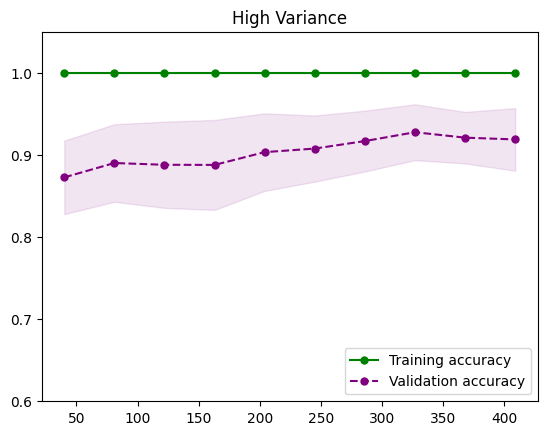

In [ ]:
plt.plot(train_sizes, mean_train, color='green',
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, mean_train + std_train,
                 mean_train - std_train, alpha=0.10,
                 color='green')
plt.plot(train_sizes, mean_test, color='purple',
         marker='o', markersize=5, linestyle='--', label='Validation accuracy')
plt.fill_between(train_sizes, mean_test + std_test,
                 mean_test - std_test, alpha=0.10,
                 color='purple')

plt.ylim(0.6,1.05)
plt.title('High Variance')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

pipe_lc = Pipeline([
    ('scaler', StandardScaler()),
    ('decomposer', PCA(n_components=5)),
    ('clf', SVC(kernel='poly', degree=2, C=1))
])

train_sizes, scores_train, scores_test = learning_curve(
    estimator=pipe_lc,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=10,
    n_jobs=-1)

mean_train = np.mean(scores_train, axis=1)
std_train = np.std(scores_train, axis=1)
mean_test = np.mean(scores_test, axis=1)
std_test = np.std(scores_test, axis=1)

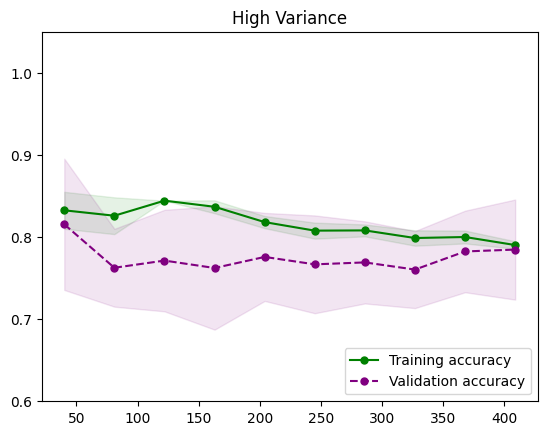

In [ ]:
plt.plot(train_sizes, mean_train, color='green',
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, mean_train + std_train,
                 mean_train - std_train, alpha=0.10,
                 color='green')
plt.plot(train_sizes, mean_test, color='purple',
         marker='o', markersize=5, linestyle='--', label='Validation accuracy')
plt.fill_between(train_sizes, mean_test + std_test,
                 mean_test - std_test, alpha=0.10,
                 color='purple')

plt.ylim(0.6,1.05)
plt.title('High Variance')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

pipe_lc = Pipeline([
    ('scaler', StandardScaler()),
    ('decomposer', PCA(n_components=5)),
    ('clf', SVC(kernel='linear'))
])

train_sizes, scores_train, scores_test = learning_curve(
    estimator=pipe_lc,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=10,
    n_jobs=-1)

mean_train = np.mean(scores_train, axis=1)
std_train = np.std(scores_train, axis=1)
mean_test = np.mean(scores_test, axis=1)
std_test = np.std(scores_test, axis=1)

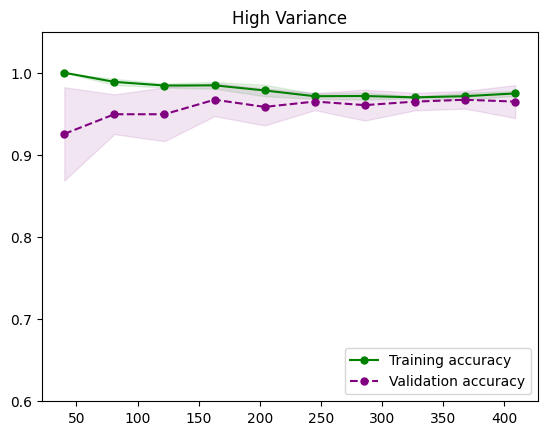

In [ ]:
plt.plot(train_sizes, mean_train, color='green',
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, mean_train + std_train,
                 mean_train - std_train, alpha=0.10,
                 color='green')
plt.plot(train_sizes, mean_test, color='purple',
         marker='o', markersize=5, linestyle='--', label='Validation accuracy')
plt.fill_between(train_sizes, mean_test + std_test,
                 mean_test - std_test, alpha=0.10,
                 color='purple')

plt.ylim(0.6,1.05)
plt.title('High Variance')
plt.legend(loc='lower right')
plt.show()

# Using validation curvs to address over- and underfitting issues

In [ ]:
from sklearn.model_selection import validation_curve

pipe_lc = Pipeline([
    ('scaler', StandardScaler()),
    #('decomposer', PCA()),
    ('clf', SVC(kernel='linear'))
])

param_range = [1e-4,1e-3,1e-2,1e-1,1e-0,1e1,1e2,1e3]
scores_train, scores_test = validation_curve(
    estimator=pipe_lc,
    X=X_train,
    y=y_train,
    param_name='clf__C',
    param_range=param_range,
    n_jobs=-1,
    cv=10)

mean_train = np.mean(scores_train, axis=1)
std_train = np.std(scores_train, axis=1)
mean_test = np.mean(scores_test, axis=1)
std_test = np.std(scores_test, axis=1)

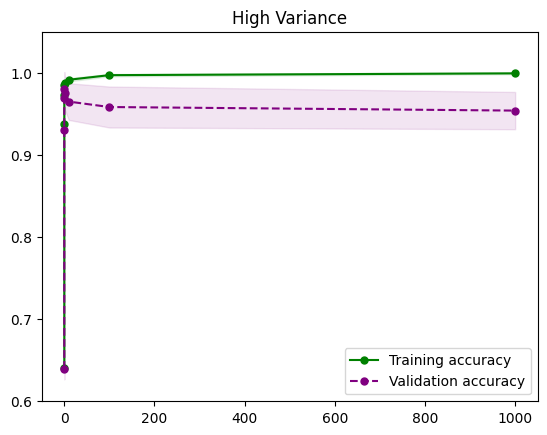

In [ ]:
plt.plot(param_range, mean_train, color='green',
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, mean_train + std_train,
                 mean_train - std_train, alpha=0.10,
                 color='green')
plt.plot(param_range, mean_test, color='purple',
         marker='o', markersize=5, linestyle='--', label='Validation accuracy')
plt.fill_between(param_range, mean_test + std_test,
                 mean_test - std_test, alpha=0.10,
                 color='purple')

plt.ylim(0.6,1.05)
plt.title('High Variance')
plt.legend(loc='lower right')
plt.show()